In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
import seaborn as sns

## Load the training data into feature matrix, class labels, and event ids, and separate the dataset:

In [3]:
from implementations import *

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [5]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [6]:
logistic = True
tX_list, ids_list, y_list = separate_dataset(tX, ids, y, logistic)
tX_test_list, ids_test_list = separate_dataset(tX_test, ids_test) 

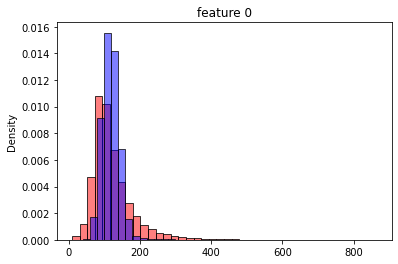

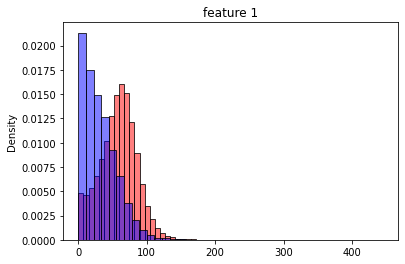

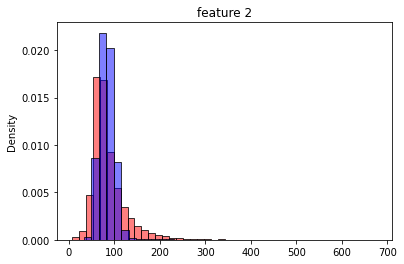

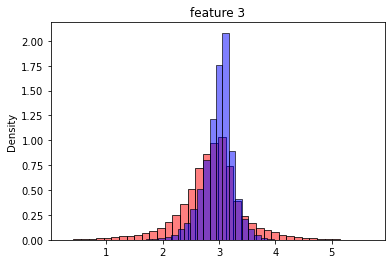

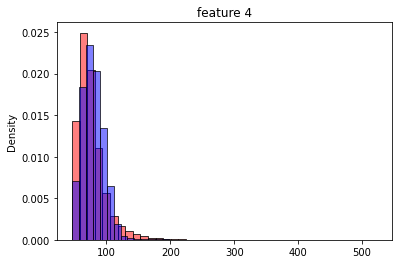

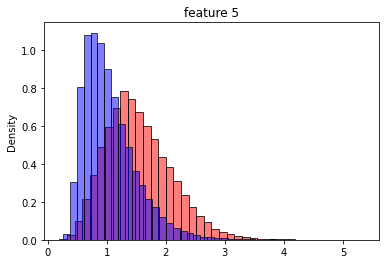

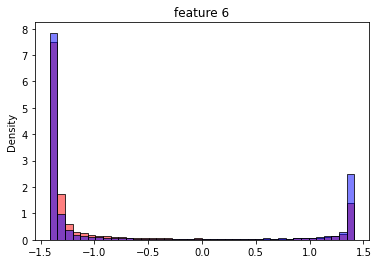

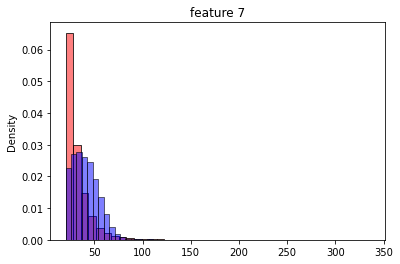

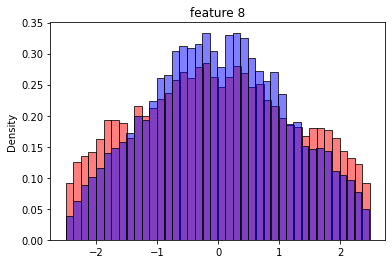

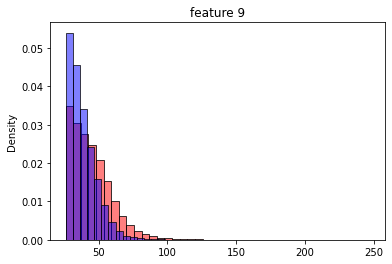

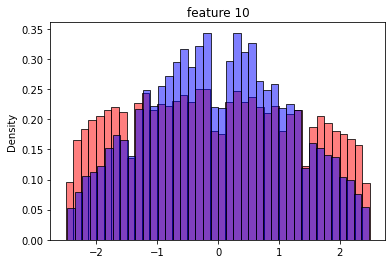

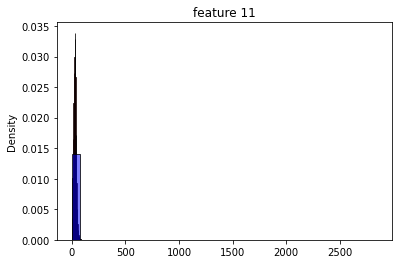

In [14]:
k = 1
for i in range(tX_list[k].shape[1]):
    plt.figure()
    sns.histplot(np.where(y_list[k] == 0, tX_list[k][:,i], np.nan), color ='r', alpha = 0.5, stat = 'density', bins = 40)
    sns.histplot(np.where(y_list[k] == 1, tX_list[k][:,i], np.nan), color ='b', alpha = 0.5, stat = 'density',  bins = 40)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()

In [10]:
tX_list[0]=np.delete(tX_list[0], [2,4,7,10,13,15], axis=1)
tX_list[1]=np.delete(tX_list[1], [3,5,11,14,16,17], axis=1)
tX_list[2]=np.delete(tX_list[2], [7,9,10,12,13,15,16,17,19], axis=1)
tX_list[3]=np.delete(tX_list[3], [3,5,6,11,12,14,15,16,17,18,20,21], axis=1)
tX_list[4]=np.delete(tX_list[4], [10,15,16,17,18,19,23,24,26], axis=1)
tX_list[5]=np.delete(tX_list[5], [3,8,9,10,15,16,18,19,20,21,22,24,25,27,28], axis=1)

In [17]:
index=[]
for seT in range(len(tX_list)):
    for indexX, column in enumerate(tX_list[seT].T):
        x_= np.mean(column)
        for indexY, column2 in enumerate(tX_list[seT].T):
            y_= np.mean(column2)
            num=np.dot((column - x_),(column2 - y_))
            den= np.sqrt(np.dot(column - x_,column - x_)*np.dot(column2 - y_,column2 - y_))
            corr= num/den
            if corr> 0.85 and indexX!= indexY and indexX< indexY:
                index.append([seT,indexX, indexY])

print(index)

[[1, 0, 2], [3, 0, 2], [4, 8, 18], [4, 15, 18], [5, 0, 2]]


In [124]:
tX_test_list[0]=np.delete(tX_test_list[0], [2,4,7,10,13,15], axis=1)
tX_test_list[1]=np.delete(tX_test_list[1], [3,5,11,14,16,17], axis=1)
tX_test_list[2]=np.delete(tX_test_list[2], [7,9,10,12,13,15,16,17,19], axis=1)
tX_test_list[3]=np.delete(tX_test_list[3], [3,5,6,11,12,14,15,16,17,18,20,21], axis=1)
tX_test_list[4]=np.delete(tX_test_list[4], [10,15,16,17,18,19,23,24,26], axis=1)
tX_test_list[5]=np.delete(tX_test_list[5], [3,8,9,10,15,16,18,19,20,21,22,24,25,27,28], axis=1)

In [128]:
for i in range(6):
    print(tX_list[i][0,:1])

[86.24]
[143.905]
[162.172]
[160.937]
[110.686]
[138.47]


In [ ]:
k = 5
for i in range(tX_list[k].shape[1]):
    plt.figure()
    sns.histplot(tX_list[k][:,i], color ='r', alpha = 0.5, stat = 'density', bins = 70)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()

In [93]:
from scipy.stats import skew
i=5
for k in range(tX_list[i].shape[1]):
    print('dataset {d}, feature {f}, skew = {s}'.format(d = i, f = k, s = skew(tX_list[i][:,k])))

dataset 5, feature 0, skew = 4.526779255502234
dataset 5, feature 1, skew = 1.5854759538348735
dataset 5, feature 2, skew = 4.1534419904406725
dataset 5, feature 3, skew = 0.5526495637370924
dataset 5, feature 4, skew = 2.422586360535754
dataset 5, feature 5, skew = -0.330918089632574
dataset 5, feature 6, skew = 0.3625227514086151
dataset 5, feature 7, skew = -1.1804819418198131
dataset 5, feature 8, skew = 0.050108182105138704
dataset 5, feature 9, skew = 3.1331648149755567
dataset 5, feature 10, skew = 0.0073505210291059594
dataset 5, feature 11, skew = 0.007643980406921144
dataset 5, feature 12, skew = -0.007490806451555571
dataset 5, feature 13, skew = -0.00366221267740773


In [117]:
tX_list[0] = np.append(tX_list[0], np.log(tX_list[0][:,[0,1,3,4,5,7,9,10]]), axis = 1)
tX_list[1] = np.append(tX_list[1], np.log(tX_list[1][:,[0,2,4,7,9,11]]), axis = 1)
tX_list[2] = np.append(tX_list[2], np.log(tX_list[2][:,[0,1,4,5,6,7,8,9,11]]), axis = 1)
tX_list[3] = np.append(tX_list[3], np.log(tX_list[3][:,[0,2,4,6]]), axis = 1)
tX_list[4] = np.append(tX_list[4], np.log(tX_list[4][:,[0,1,2,4,7,8,9,11,14,15,18]]), axis = 1)
tX_list[5] = np.append(tX_list[5], np.log(tX_list[5][:,[0,2,4,9]]), axis = 1)

In [118]:
tX_test_list[0] = np.append(tX_test_list[0], np.log(tX_test_list[0][:,[0,1,3,4,5,7,9,10]]), axis = 1)
tX_test_list[1] = np.append(tX_test_list[1], np.log(tX_test_list[1][:,[0,2,4,7,9,11]]), axis = 1)
tX_test_list[2] = np.append(tX_test_list[2], np.log(tX_test_list[2][:,[0,1,4,5,6,7,8,9,11]]), axis = 1)
tX_test_list[3] = np.append(tX_test_list[3], np.log(tX_test_list[3][:,[0,2,4,6]]), axis = 1)
tX_test_list[4] = np.append(tX_test_list[4], np.log(tX_test_list[4][:,[0,1,2,4,7,8,9,11,14,15,18]]), axis = 1)
tX_test_list[5] = np.append(tX_test_list[5], np.log(tX_test_list[5][:,[0,2,4,9]]), axis = 1)

In [120]:
for i in range(6):
    tX_list[i], mean, std = standardize(tX_list[i])
    tX_test_list[i] = standardize(tX_test_list[i], mean, std)

In [ ]:
k = 0
for i in range(tX_list[k].shape[1]):
    plt.figure()
    sns.histplot(tX_list[k][:,i], color ='r', alpha = 0.5, stat = 'density', bins = 70)
    plt.title('feature {k}'.format(k =i))
    #plt.xlim([0, 250])
    plt.show()